In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
plt.rcParams.update({'font.size': 15})

In [3]:
pred_path = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\predictions'

In [7]:
vals = pd.read_csv(os.path.join(pred_path,'SHAPvals_2xPvM_sylf.csv'))
truth = pd.read_csv(os.path.join(pred_path,'SHAPtruths_2xPvM_sylf.csv'))

In [8]:
vals.columns, truth.columns

(Index(['Unnamed: 0', 'event_no', 'az_width', 'az_rqe', 'az_charge_log10',
        'az_dom_time', 'az_dom_x', 'az_dom_y', 'az_dom_z', 'ze_width', 'ze_rqe',
        'ze_charge_log10', 'ze_dom_time', 'ze_dom_x', 'ze_dom_y', 'ze_dom_z',
        'azk_width', 'azk_rqe', 'azk_charge_log10', 'azk_dom_time', 'azk_dom_x',
        'azk_dom_y', 'azk_dom_z', 'zek_width', 'zek_rqe', 'zek_charge_log10',
        'zek_dom_time', 'zek_dom_x', 'zek_dom_y', 'zek_dom_z'],
       dtype='object'),
 Index(['Unnamed: 0', 'event_no', 'azimuth', 'zenith', 'azimuth_retro',
        'zenith_retro', 'azimuth_sigma', 'zenith_sigma', 'energy_log10', 'pid',
        'elasticity', 'azimuth_pred', 'zenith_pred', 'azimuth_k', 'zenith_k'],
       dtype='object'))

In [29]:
import sqlite3
with sqlite3.connect(r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\raw_data\dev_lvl7_mu_nu_e_classification_v003_unscaled.db') as con:
    query = f"SELECT event_no, width, rqe, charge_log10, dom_time, dom_x, dom_y, dom_z FROM features WHERE event_no IN {tuple(truth.event_no.to_numpy(dtype=int))}"
    x = pd.read_sql(query,con)

In [35]:
np.arange(x.shape[1]), vals[['az_width', 'az_rqe', 'az_charge_log10',
        'az_dom_time', 'az_dom_x', 'az_dom_y', 'az_dom_z']].mean(0).values

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([-0.11028235, -0.0005394 ,  0.00243631, -0.01036749,  0.02219178,
        -0.01365988, -0.04880871]))

<ErrorbarContainer object of 3 artists>

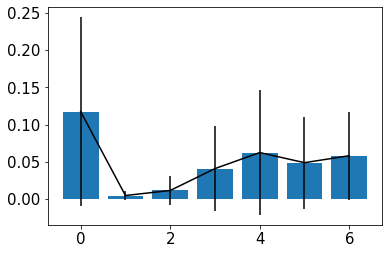

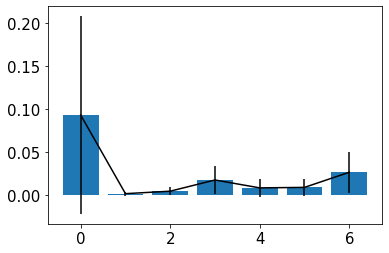

In [46]:
fig, ax = plt.subplots()
ax.bar(np.arange(x.shape[1]-1),vals[['az_width', 'az_rqe', 'az_charge_log10',
        'az_dom_time', 'az_dom_x', 'az_dom_y', 'az_dom_z']].abs().mean(0).values)
# fig, ax = plt.subplots()
ax.errorbar(np.arange(x.shape[1]-1),vals[['az_width', 'az_rqe', 'az_charge_log10',
        'az_dom_time', 'az_dom_x', 'az_dom_y', 'az_dom_z']].abs().mean(0).values,vals[['az_width', 'az_rqe', 'az_charge_log10',
        'az_dom_time', 'az_dom_x', 'az_dom_y', 'az_dom_z']].abs().std(0).values,c='k')

fig, ax = plt.subplots()
ax.bar(np.arange(x.shape[1]-1),vals[['ze_width', 'ze_rqe', 'ze_charge_log10',
        'ze_dom_time', 'ze_dom_x', 'ze_dom_y', 'ze_dom_z']].abs().mean(0).values)
# fig, ax = plt.subplots()
ax.errorbar(np.arange(x.shape[1]-1),vals[['ze_width', 'ze_rqe', 'ze_charge_log10',
        'ze_dom_time', 'ze_dom_x', 'ze_dom_y', 'ze_dom_z']].abs().mean(0).values,vals[['ze_width', 'ze_rqe', 'ze_charge_log10',
        'ze_dom_time', 'ze_dom_x', 'ze_dom_y', 'ze_dom_z']].abs().std(0).values,c='k')


In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(x.shape[1]-1),vals[['az_width', 'az_rqe', 'az_charge_log10',
        'az_dom_time', 'az_dom_x', 'az_dom_y', 'az_dom_z']].mean(0).values)

In [47]:
x

,event_no,width,rqe,charge_log10,dom_time,dom_x,dom_y,dom_z
0,69439,8.0,1.35,0.875,10065.0,31.250000,-72.930000,-292.290009
1,69439,8.0,1.35,0.375,10982.0,31.250000,-72.930000,-390.410004
2,69439,1.0,1.00,1.475,10092.0,72.370003,-66.599998,-278.980011
3,69439,8.0,1.00,0.725,10667.0,72.370003,-66.599998,-278.980011
4,69439,1.0,1.35,0.725,9962.0,72.370003,-66.599998,-292.989990
...,...,...,...,...,...,...,...,...
2556,102087549,1.0,1.35,0.875,9879.0,-10.970000,6.720000,-290.160004
2557,102087549,1.0,1.35,1.275,9881.0,-10.970000,6.720000,-297.170013
2558,102087549,1.0,1.35,1.275,9966.0,-10.970000,6.720000,-311.190002
2559,102087549,1.0,1.35,1.125,10051.0,-10.970000,6.720000,-311.190002
